# Multi-Classification Modeling with top 7 beacons with DNN
## Index
- Load data & import modules
- Preprocessing & split
- DNN modeling
- Ploting 
- Cofusion Matrix


# Load data & import moduels
- tensorflow version 2.9.1 required

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/BEST/ios_clf_direction/

/content/drive/MyDrive/BEST/ios_clf_direction


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220719082949.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949


In [ ]:
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.3 kB/s 
     |████████████████████████████████| 438 kB 44.2 MB/s 
     |████████████████████████████████| 5.8 MB 40.9 MB/s 
     |████████████████████████████████| 1.6 MB 44.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
datas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_7_concated{data[0]}0{index}.csv'))
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_7_concated{data[0]}{index}.csv'))
    datas.append(no_supervised)

In [ ]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.9.1


# Preprocessing & split
- Concat all the data
- split into 7:3

In [ ]:
result = pd.concat(datas)

In [ ]:
result.loc[result['location'] == 'A011', 'location'] = 'A11'
result.loc[result['location'] == 'A010', 'location'] = 'A10'

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result.iloc[:, 1:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(result)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

21617 examples in training, 9189 examples for testing.


# DNN modeling
- Multi-Classification with Top 7 beacons


# Hyperparameter Tuning
- Normalization : Weight Normalization
- learning rate : [0.01, 0.001, 0.0001]
- loss: categorical_crossentropy
- Optimaization: Adam
- epoch: 50
- output layer: 31
- activation: Relu
- activation: Softmax

# Result
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.
- loss: 0.2331
- accuracy: 0.9321 
- precision_1: 0.9347 
- recall_1: 0.9304 
- f1_score: 0.9305 
- 995ms/epoch - 7ms/step

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result.iloc[:, 2:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X[0]

array([-200.  ,  -71.24, -200.  ,  -79.  , -200.  , -200.  , -200.  ,
       -200.  , -200.  , -200.  ,  -68.  ,  -81.  ,  -77.96,  -63.  ,
       -200.  , -200.  , -200.  , -200.  , -200.  ,  -55.29, -200.  ,
       -200.  ])

In [ ]:
X = np.asarray(X).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,shuffle=True)

In [ ]:
X_train.shape

(21564, 22)

In [ ]:
X[0]

array([-200.  ,  -71.24, -200.  ,  -79.  , -200.  , -200.  , -200.  ,
       -200.  , -200.  , -200.  ,  -68.  ,  -81.  ,  -77.96,  -63.  ,
       -200.  , -200.  , -200.  , -200.  , -200.  ,  -55.29, -200.  ,
       -200.  ], dtype=float32)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
!pip install IPython
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# callback to save the weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
tf.random.set_seed(42)
initializer = tf.keras.initializers.HeNormal()

def model_builder(hp):
   model = keras.Sequential()
    
   hp_unit = hp.Int('units', min_value=32, max_value=256, step=32)
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(keras.layers.Dense(31, activation = 'softmax'))

   # learning rate = [0.01, 0.001, 0.0001]
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

   opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
   loss = tf.keras.losses.categorical_crossentropy
   model.compile(optimizer= opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=31, average='macro', threshold=0.5)])


   return model

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 135 kB 5.1 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     factor=3,
                     hyperband_iterations=2,
                     directory = 'hi',
                     project_name = 'ios_clf_6')

In [ ]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.0001.



In [ ]:
model_based_tuner = tuner.hypermodel.build(best_hps)
history = model_based_tuner.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_train,y_train), callbacks= [ClearTrainingOutput()])

Epoch 1/50
674/674 [==============================] - 19s 21ms/step - loss: 1.1728 - accuracy: 0.6106 - precision_1: 0.8202 - recall_1: 0.3779 - f1_score: 0.4675 - val_loss: 0.8164 - val_accuracy: 0.6804 - val_precision_1: 0.8547 - val_recall_1: 0.5250 - val_f1_score: 0.5771
Epoch 2/50
674/674 [==============================] - 12s 17ms/step - loss: 0.7405 - accuracy: 0.7259 - precision_1: 0.8240 - recall_1: 0.5749 - f1_score: 0.6313 - val_loss: 0.6749 - val_accuracy: 0.7694 - val_precision_1: 0.8609 - val_recall_1: 0.6074 - val_f1_score: 0.6359
Epoch 3/50
674/674 [==============================] - 13s 19ms/step - loss: 0.6330 - accuracy: 0.7668 - precision_1: 0.8386 - recall_1: 0.6397 - f1_score: 0.6942 - val_loss: 0.5895 - val_accuracy: 0.8020 - val_precision_1: 0.8416 - val_recall_1: 0.6712 - val_f1_score: 0.7044
Epoch 4/50
674/674 [==============================] - 13s 19ms/step - loss: 0.5571 - accuracy: 0.7981 - precision_1: 0.8493 - recall_1: 0.7001 - f1_score: 0.7480 - val_loss

In [ ]:
model_based_tuner_dict = history.history
model_based_tuner_dict.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score'])

In [ ]:
results = model_based_tuner.evaluate(X_test,  y_test, verbose=2)

289/289 - 1s - loss: 0.1564 - accuracy: 0.9515 - precision_1: 0.9535 - recall_1: 0.9488 - f1_score: 0.9508 - 820ms/epoch - 3ms/step


# Ploting 

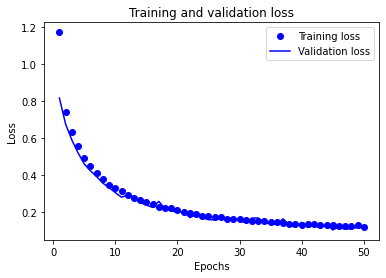

In [ ]:
acc = model_based_tuner_dict['accuracy']
val_acc = model_based_tuner_dict['val_accuracy']
loss = model_based_tuner_dict['loss']
val_loss = model_based_tuner_dict['val_loss']
recall = model_based_tuner_dict['recall_1']
val_recall = model_based_tuner_dict['val_recall_1']
f1_score = model_based_tuner_dict['f1_score']
val_f1_score = model_based_tuner_dict['val_f1_score']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

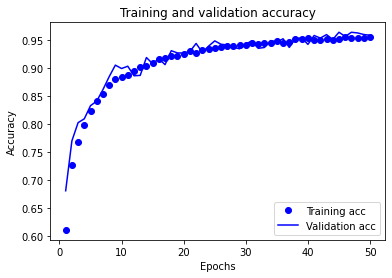

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

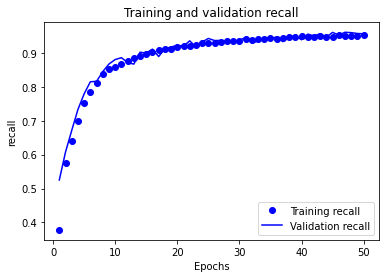

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()

plt.show()

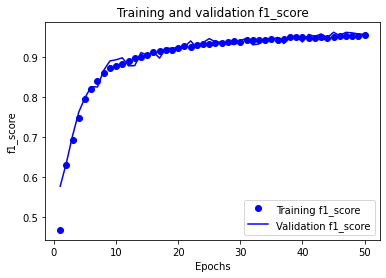

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, f1_score, 'bo', label='Training f1_score')
plt.plot(epochs, val_f1_score, 'b', label='Validation f1_score')
plt.title('Training and validation f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.show()

# Confusion Matrix

289/289 [==============================] - 2s 5ms/step
[16 17 10 ...  9 16 24]
Confusion Matrix


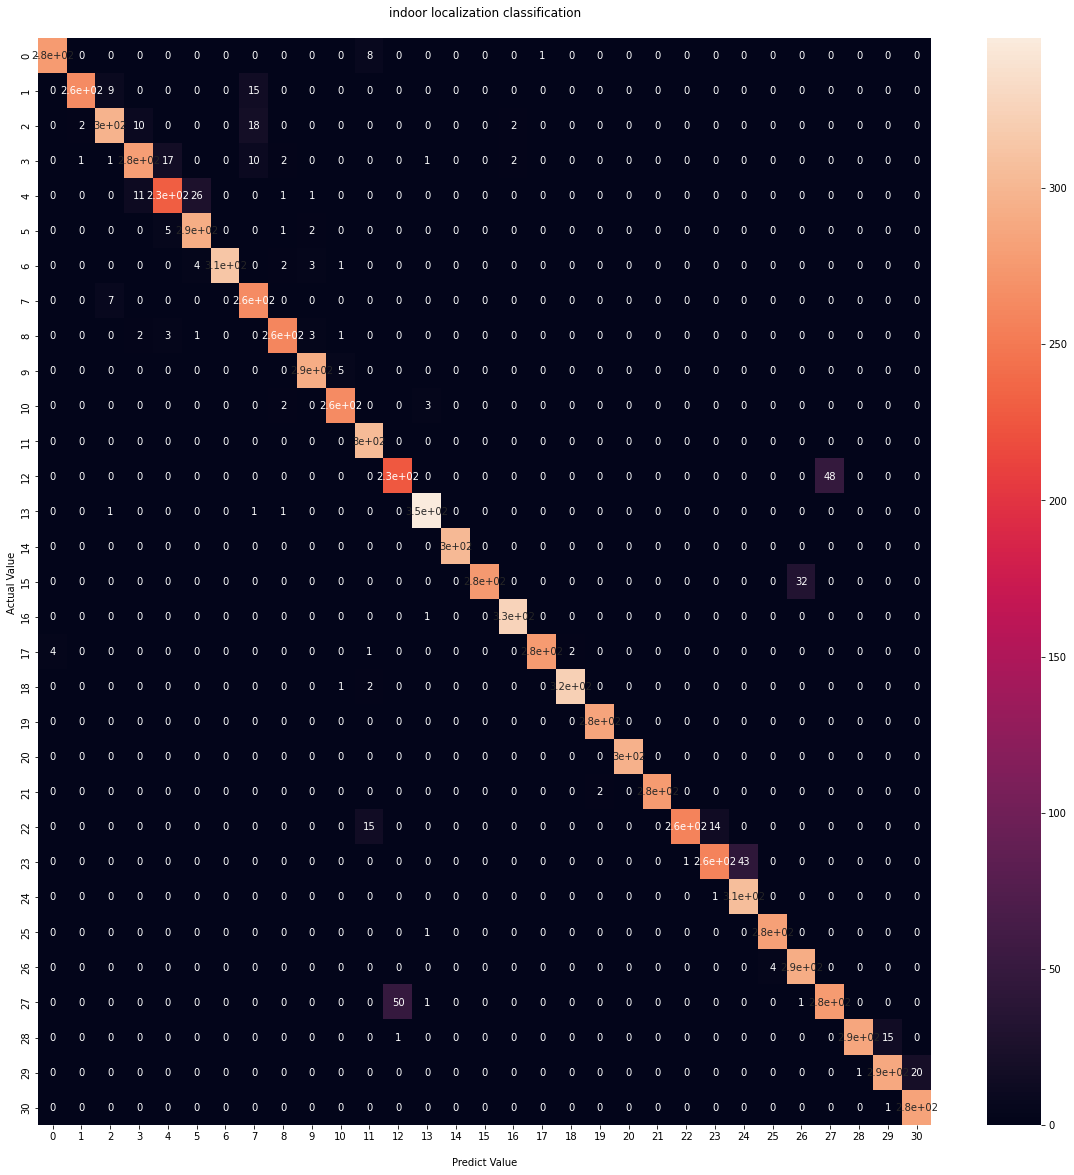

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_based_tuner.predict(X_test),axis=1)
print(Y_pred)
print('Confusion Matrix')

cf_matrix = confusion_matrix(y_test_arg, Y_pred)

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True)
ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_based_tuner)
tflite_model = converter.convert()

# Save the model.
with open('ios_beacon7concat.tflite', 'wb') as f:
  f.write(tflite_model)

# Test Data

In [ ]:
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

#Filtered_Test_U01

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}0{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)


def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [ ]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]


In [ ]:
testdatas[0]

,location,001,002,003,004,005,006,007,008,009,...,013,014,015,016,017,018,019,020,021,022
0,S01,-200.000000,-70.00000,-200.0,-88.00000,-200.000000,-200,-200.0,-200.000000,-200,...,-84.000000,-62.000000,-200,-200,-200,-200,-200,-53.000000,-200,-200
1,S01,-89.498505,-70.00000,-200.0,-86.99900,-200.000000,-200,-200.0,-200.000000,-200,...,-83.499504,-62.000000,-200,-200,-200,-200,-200,-53.000000,-200,-200
2,S01,-89.666230,-200.00000,-200.0,-200.00000,-200.000000,-200,-200.0,-89.996670,-200,...,-82.663570,-200.000000,-200,-200,-200,-200,-200,-53.000000,-200,-200
3,S01,-89.666230,-68.99667,-200.0,-85.66156,-200.000000,-200,-200.0,-89.996670,-200,...,-82.244770,-63.668220,-200,-200,-200,-200,-200,-53.000000,-200,-200
4,S01,-200.000000,-68.99751,-200.0,-84.73978,-200.000000,-200,-200.0,-89.494026,-200,...,-200.000000,-64.003494,-200,-200,-200,-200,-200,-53.503490,-200,-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,S01,-88.792760,-73.70121,-200.0,-84.95001,-200.000000,-200,-200.0,-200.000000,-200,...,-82.309880,-71.537890,-200,-200,-200,-200,-200,-60.398052,-200,-200
181,S01,-88.408200,-73.53934,-200.0,-84.95001,-200.000000,-200,-200.0,-200.000000,-200,...,-82.252600,-71.514366,-200,-200,-200,-200,-200,-60.293175,-200,-200
182,S01,-88.084200,-200.00000,-200.0,-200.00000,-200.000000,-200,-200.0,-200.000000,-200,...,-82.066610,-200.000000,-200,-200,-200,-200,-200,-60.149147,-200,-200
183,S01,-88.084200,-200.00000,-200.0,-84.99593,-89.910965,-200,-200.0,-200.000000,-200,...,-81.845024,-71.579346,-200,-200,-200,-200,-200,-60.149147,-200,-200


In [ ]:
# 상위 4개를 통해서 classification 하기
for data in testdatas:
  for row_index in range(len(data)):
    column_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    a = sorted(data.loc[row_index].tolist()[1:])
    b = list(a)[-7:]
    isMax = [0]
    for i in range(len(data.columns)):
      for num in b:
        if data.loc[row_index][i] == num:
          isMax.append(i)

    remove_set = set(isMax)
    column_idx = [i for i in column_idx if i not in remove_set]
    data.iloc[[row_index], column_idx] = [-200 for i in range(len(column_idx))]
  

In [ ]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]

for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)

for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
result_test = pd.concat(testdatas)

In [ ]:
result_test.reset_index(inplace=True)

In [ ]:
result_test.drop('index', axis=1, inplace=True)

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result_test.iloc[:, 1:])
y = le.fit_transform(np.array(result_test['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


87/87 [==============================] - 0s 3ms/step
[21 21 21 ... 30 30 30]
Confusion Matrix


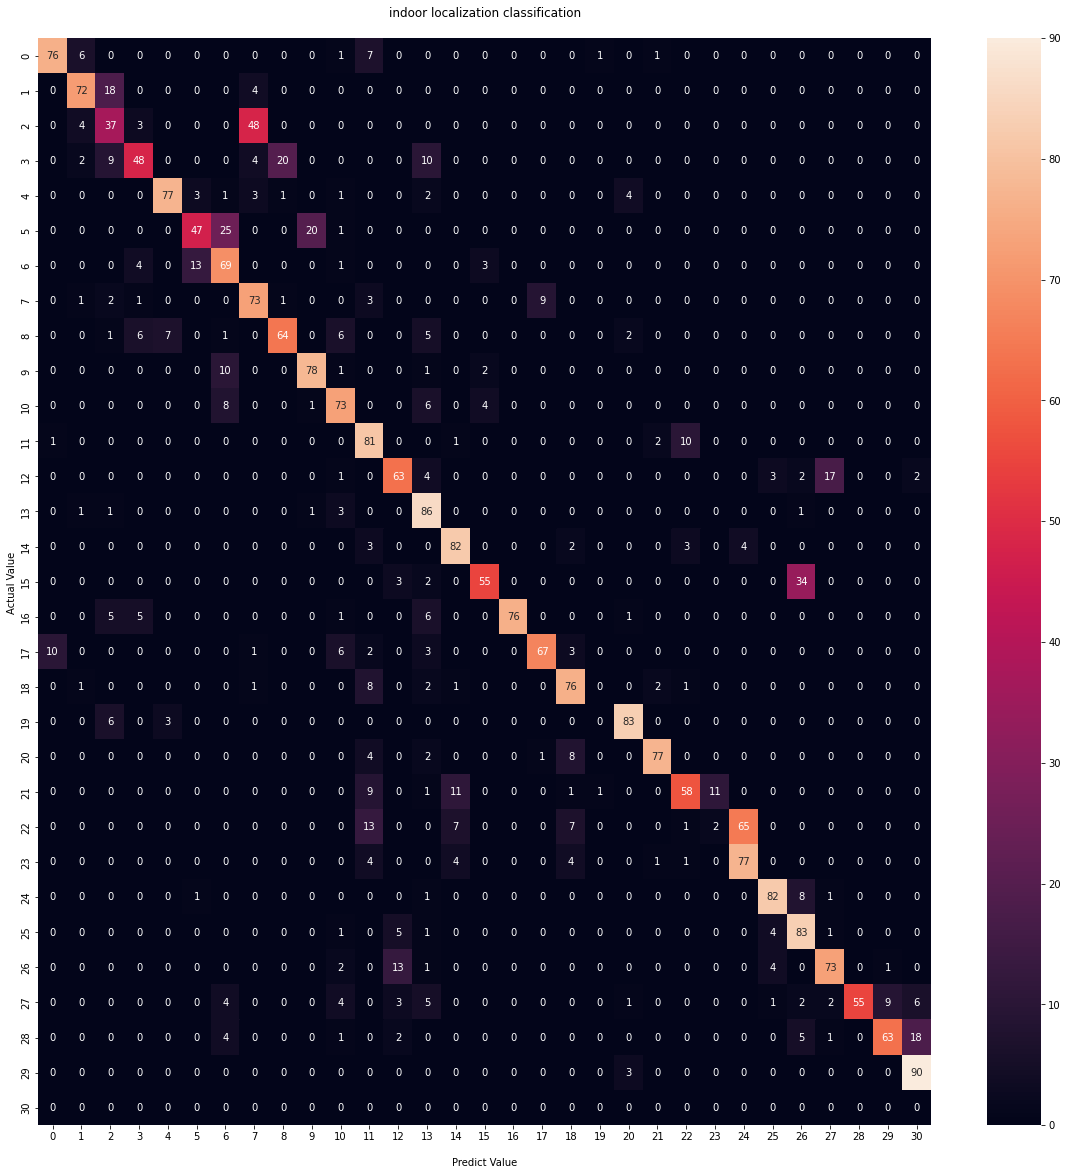

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(y,axis=1)
Y_pred = np.argmax(model_based_tuner.predict(X),axis=1)
print(Y_pred)
print('Confusion Matrix')

cf_matrix = confusion_matrix(y_test_arg, Y_pred)

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True)
ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("f1score: ", f1_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("accuracy: ", accuracy_score(y_true=y_test_arg, y_pred=Y_pred))
print("precision: ", precision_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("recall: ", recall_score(y_true=y_test_arg, y_pred=Y_pred,  average='weighted'))

f1score:  0.46385112340979545
accuracy:  0.46997482919813016
precision:  0.4701566402171128
recall:  0.46997482919813016


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_arg

array([20, 20, 20, ..., 29, 29, 29])